# 1. Modeling gravitational fields

## 1.1 Defining a vector field

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x,y): # here is the f function used in the followiing function 
    return (-2*y, x) # here is the readwsas <<<<<<<<<<<< ========= 2 <<=== 

In [35]:
def plot_vector_field(f,xmin,xmax,ymin,ymax,xstep=1,ystep=1): # xstep and ystep are the distance between two arrows in the x and y direction respectively 

    X,Y = np.meshgrid(np.arange(xmin,xmax, xstep),np.arange(ymin,ymax, ystep)) # create a grid of points

    # compute the vector field at each point in the grid
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y) # x component of the vector field Note -2 x in the top definiction of f
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y) # y component of the vector field
    # print("this is X \n", X)
    # print("===========================================")
    # print("this is Y \n", Y)
    # print("===========================================")
    # print("this is U \n", U)    All 
    # print("============================================")
    # print("this is V \n", V)    
    # print("===========================================")
    # print(X, Y) 
    # print("\n")
    # print("===========================================")
    # print(U, V)
    plt.quiver(X, Y, color='blue') # plot the vector field using quiver plot function
    plt.quiver(U, V,color='red') # plot the vector field using quiver plot function

    fig = plt.gcf() # get current figure     
    fig.set_size_inches(7,7) # set the figure size to be 7x7 inches
    plt.show()

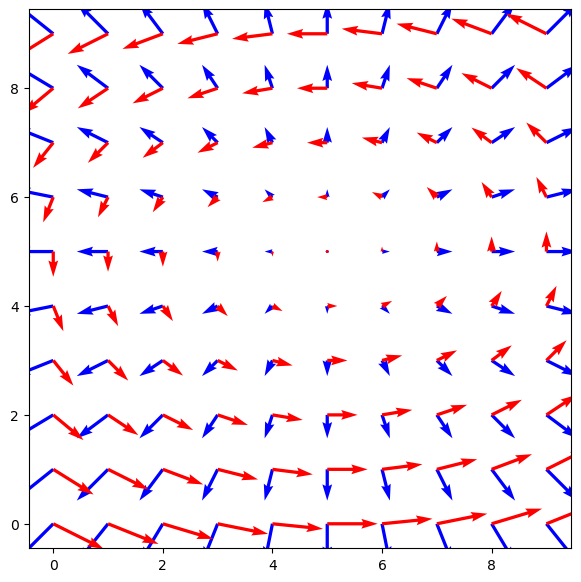

In [37]:
plot_vector_field(f,-5,5,-5,5)
#plot_vector_field(f,-5,5,-10,10)

## 1.2 Defining a simple force field

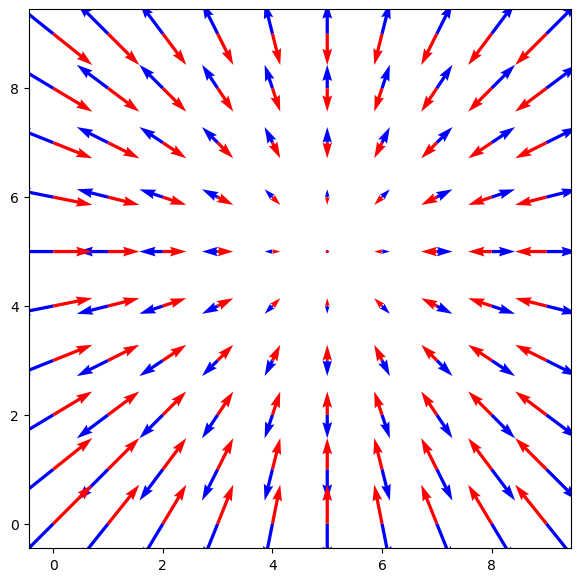

In [38]:
def f(x,y):
    return (-x,-y)

plot_vector_field(f,-5,5,-5,5)

# 2. Adding gravity to the asteroid game

See asteroids.py

## 2.2 Exercises

**EXERCISE** Where do all of the vectors in the vector field $(-2-x,4-y)$ point?

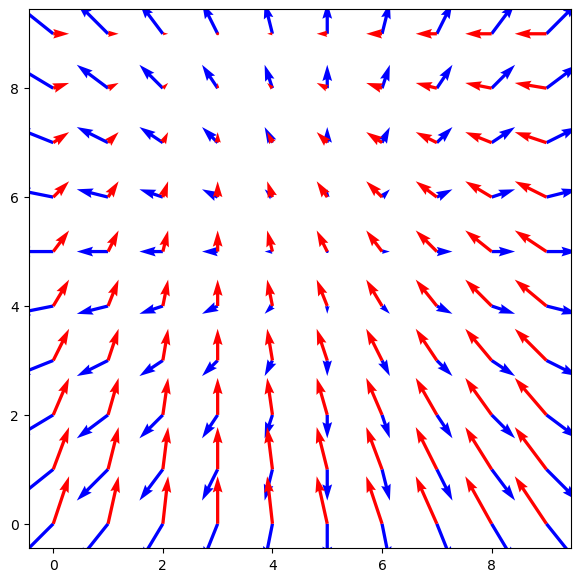

In [39]:
def g(x,y):
    return (-2-x,4-y)
plot_vector_field(g,-5,5,-5,5)

# 3 Introducing potential energy

## 3.1 Defining a potential energy scalar field

In [43]:
def u(x,y):
    return 0.5 * (x**2 + y**2)

In [ ]:
import matplotlib.pyplot    as     plt
from   matplotlib           import cm
from   matplotlib.ticker    import LinearLocator, FormatStrFormatter
from   mpl_toolkits.mplot3d import Axes3D

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xstep=0.25,ystep=0.25,
                      c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    #ax = fig.gca(projection='3d') # this is deprecated not working anymore
    ax = fig.add_subplot(111, projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha, linewidth=0, antialiased=antialiased)

In [ ]:
fig = plt.figure()
fig.set_size_inches(7,7)
ax = fig.add_subplot(111, projection='3d')

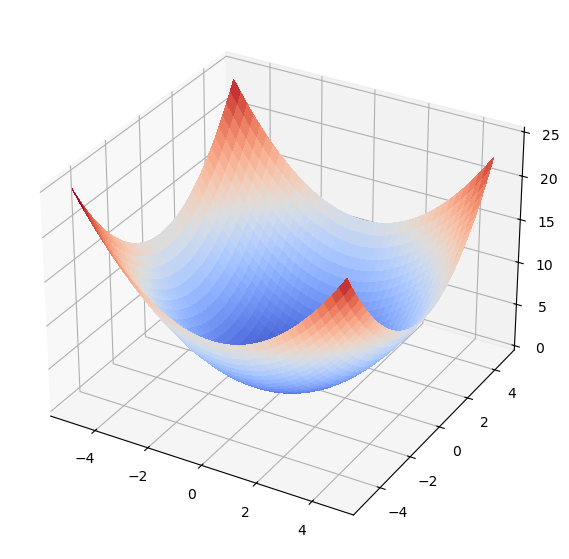

In [47]:
plot_scalar_field(u, -5, 5, -5, 5) # same data but different representation as the following heatmap <<<<<<<<<<< ========= 1 <<===

## 3.2 Plotting a scalar field as a heatmap

<Figure size 700x700 with 0 Axes>

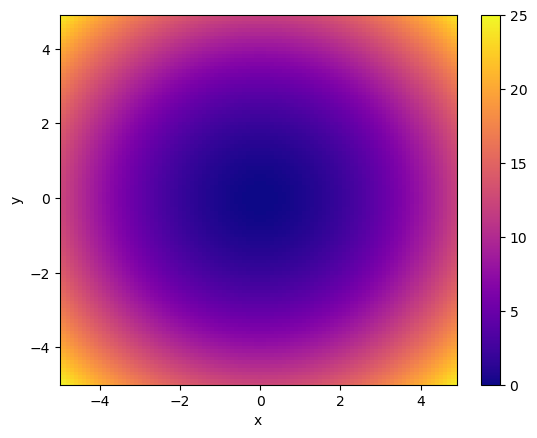

In [48]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xstep=0.1,ystep=0.1):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    plt.xlabel('x')
    plt.ylabel('y')

scalar_field_heatmap(u,-5,5,-5,5) # same data but different representation as the above 3D plot using plot_surface  <<<<<<<<<<< ========= 2 <<===

## 3.3 Plotting a scalar field as a contour map

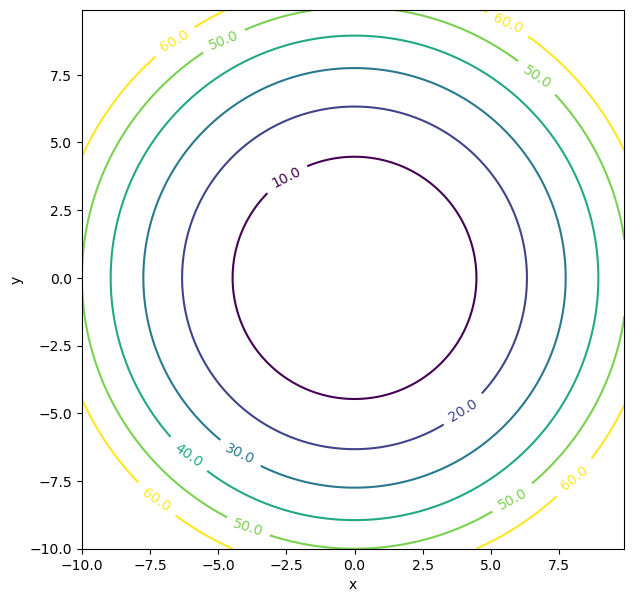

In [ ]:
def scalar_field_contour(f,xmin,xmax,ymin,ymax,levels=None):

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, 0.1)
    Y = np.arange(ymin, ymax, 0.1)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    Z = fv(X,Y)
    
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z,levels=levels)          # contour plot & the CS is the contour set
    ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f') # add labels to the contour lines， fmt 保留小数点后1位
    plt.xlabel('x')
    plt.ylabel('y')
    fig.set_size_inches(7,7)
    plt.show()
    
scalar_field_contour(u,-10,10,-10,10,levels=[10,20,30,40,50,60]) # contour plot of the same data <<<<<<<<<<< ========= 3 <<=== 第三种表示法

# 4 Connecting energy and forces with the gradient

## 4.5 Exercises

**Exercise:** Plot the cross-section of $h(x,y) = e^y\sin(x)$ where $y=1$.  Plot the cross section of $h(x,y)$ where $x=\pi/6$.

In [50]:
def plot_function(f,xmin,xmax,color=None):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],c=color)

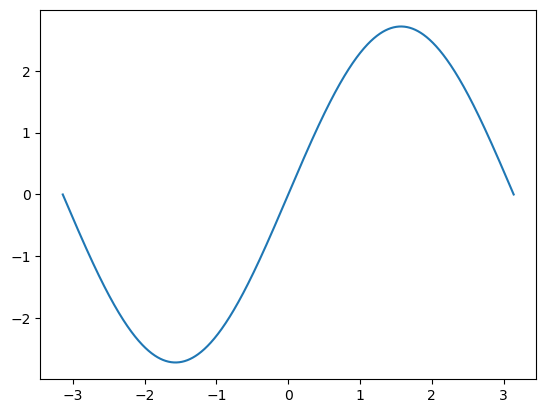

In [51]:
from math import pi, e, sin
plot_function(lambda x: e*sin(x),-pi,pi)

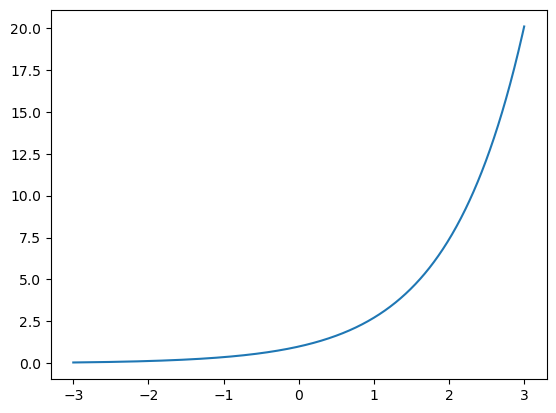

In [53]:
import math
#plot_function(lambda y: math.exp(y)/2,-3,3)
plot_function(lambda y: math.exp(y),-3,3)